# Resolução de Sistemas Lineares

### Imports

In [1]:
from numpy.random import randint
from numpy import ndarray, zeros, arange, fromiter
from matplotlib.pyplot import subplots
from scipy.linalg import solve
from statistics import mean
from time import time

### Gerador de Sistemas

In [2]:
def gerarSistema(ordem: int):
  A = randint(20, 100, (ordem, ordem)).astype(float)
  b = randint(2000, 10000, (ordem)).astype(float)
  A.flat[::ordem+1] *= randint(10, 20) * ordem
  return A, b, solve(A, b)

### Escalonamento

In [3]:
def escalonamento(A: ndarray, b: ndarray):
  n = A.shape[0]

  for i in arange(n):
    pivo = A[i, i]
    if pivo == 0: return 0
    for j in arange(i+1, n):
      m = A[j, i] / pivo
      A[j] -= m * A[i]
      b[j] -= m * b[i]

  x = zeros(n)

  for i in arange(n-1, -1, -1):
    x[i] = (b[i] - sum(A[i] * x)) / A[i, i]

  return x

### Fatoração LU

In [4]:
def fatoraçãoLU(A: ndarray, b: ndarray):
  n = A.shape[0]
  L, U = zeros((n, n)), A.copy()
  L.flat[::n+1] = 1

  for j in arange(n-1):
    pivo = U[j, j]
    if pivo == 0: return 0
    for i in arange(j+1, n):
      L[i, j] = U[i, j] / pivo
      U[i] -= L[i, j] * U[j]

  x, y = zeros(n), zeros(n)

  for i in arange(n):
    y[i] = b[i] - sum(L[i] * y)

  for i in arange(n-1, -1, -1):
    x[i] = (y[i] - sum(U[i] * x)) / U[i, i]

  return x

### Método de Gauss-Jacobi

In [5]:
def gauss_jacobi(A: ndarray, b: ndarray, e = 1e-15):
  n = A.shape[0]
  diag = A.diagonal()

  copy = A / diag
  copy.flat[::n+1] = 0
  if max(sum(abs(copy))) > 1: return 0

  x = randint(1, 10, n)
  C = -A / diag.reshape(n, 1)
  C.flat[::n+1] = 0
  G = b / diag

  while 1:
    x_ant, x = x, C @ x + G
    if max(abs(x - x_ant)) < e: break

  return x

### Método de Gauss-Seidel

In [6]:
def gauss_seidel(A: ndarray, b: ndarray, e = 1e-15):
  n = A.shape[0]
  diag = A.diagonal()

  copy = A / diag
  copy.flat[::n+1] = 0
  if max(sum(abs(copy))) > 1: return 0

  x = randint(1, 10, n).astype(float)
  C = -A / diag.reshape(n, 1)
  C.flat[::n+1] = 0
  G = b / diag

  while 1:
    x_ant = x.copy()
    for i in arange(n):
      x[i] = C[i] @ x + G[i]
    if max(abs(x - x_ant)) < e: break

  return x

### Geração de Gráficos

In [7]:
metodos = ("Escalonamento", "Fatoração LU", "Gauss-Jacobi", "Gauss-Seidel")

def plotgfx(tamanho: ndarray, tempos: ndarray):
  fig, axe = subplots(figsize = (12, 6))
  fig.tight_layout(pad = 1)
  fig.dpi = 600

  for label, elem in zip(metodos, tempos):
    axe.plot(tamanho, elem, label = label, lw = .5)
  axe.set_title("Relação entre Ordem e Tempo")
  axe.set_xlabel("Ordem do Sistema Linear")
  axe.set_ylabel("Tempo de execução (segundos)")
  axe.legend(loc = 2)

### Execução do Código

In [8]:
def execução(tamanho: ndarray):

  def execução(ordem: int):
    A, b, resp = gerarSistema(ordem)
    c1 = time()
    f1 = escalonamento(A, b)
    c2 = time()
    f2 = fatoraçãoLU(A, b)
    c3 = time()
    f3 = gauss_jacobi(A, b)
    c4 = time()
    f4 = gauss_seidel(A, b)
    c5 = time()
    m1 = mean(abs(resp - f1))
    m2 = mean(abs(resp - f2))
    m3 = mean(abs(resp - f3))
    m4 = mean(abs(resp - f4))
    print(f"{m1}, {m2}, {m3}, {m4}")
    return c2-c1, c3-c2, c4-c3, c5-c4

  return fromiter((execução(ordem) for ordem in tamanho), "4f8", tamanho.size).T

2.7547408798511698e-17, 2.7547408798511698e-17, 2.6940255581919813e-17, 2.6974950051439352e-17
2.224349177071261e-17, 2.224349177071261e-17, 2.237359603141087e-17, 2.2304207092371797e-17
1.9012569296705807e-17, 1.9012569296705807e-17, 1.9080512632848232e-17, 1.8938843548976792e-17
1.9162189196508806e-17, 1.9162189196508806e-17, 1.898763264673864e-17, 1.901582190322326e-17
1.0765693891912066e-17, 1.0765693891912066e-17, 1.0623446566881966e-17, 1.0609568779074152e-17
1.0269201577058536e-17, 1.0269201577058536e-17, 1.0367502574030555e-17, 1.0353769346512406e-17
1.4023690443026077e-17, 1.4023690443026077e-17, 1.4130252027978938e-17, 1.408347644853742e-17
1.1661949617797207e-17, 1.1661949617797207e-17, 1.1692307278626801e-17, 1.1683633661246917e-17
1.2447363741581915e-17, 1.2447363741581915e-17, 1.2452905219352397e-17, 1.2463747241077251e-17
7.777090603455771e-18, 7.777090603455771e-18, 7.776114821500534e-18, 7.768959087162131e-18
9.919069984568293e-18, 9.919069984568293e-18, 9.910002111852

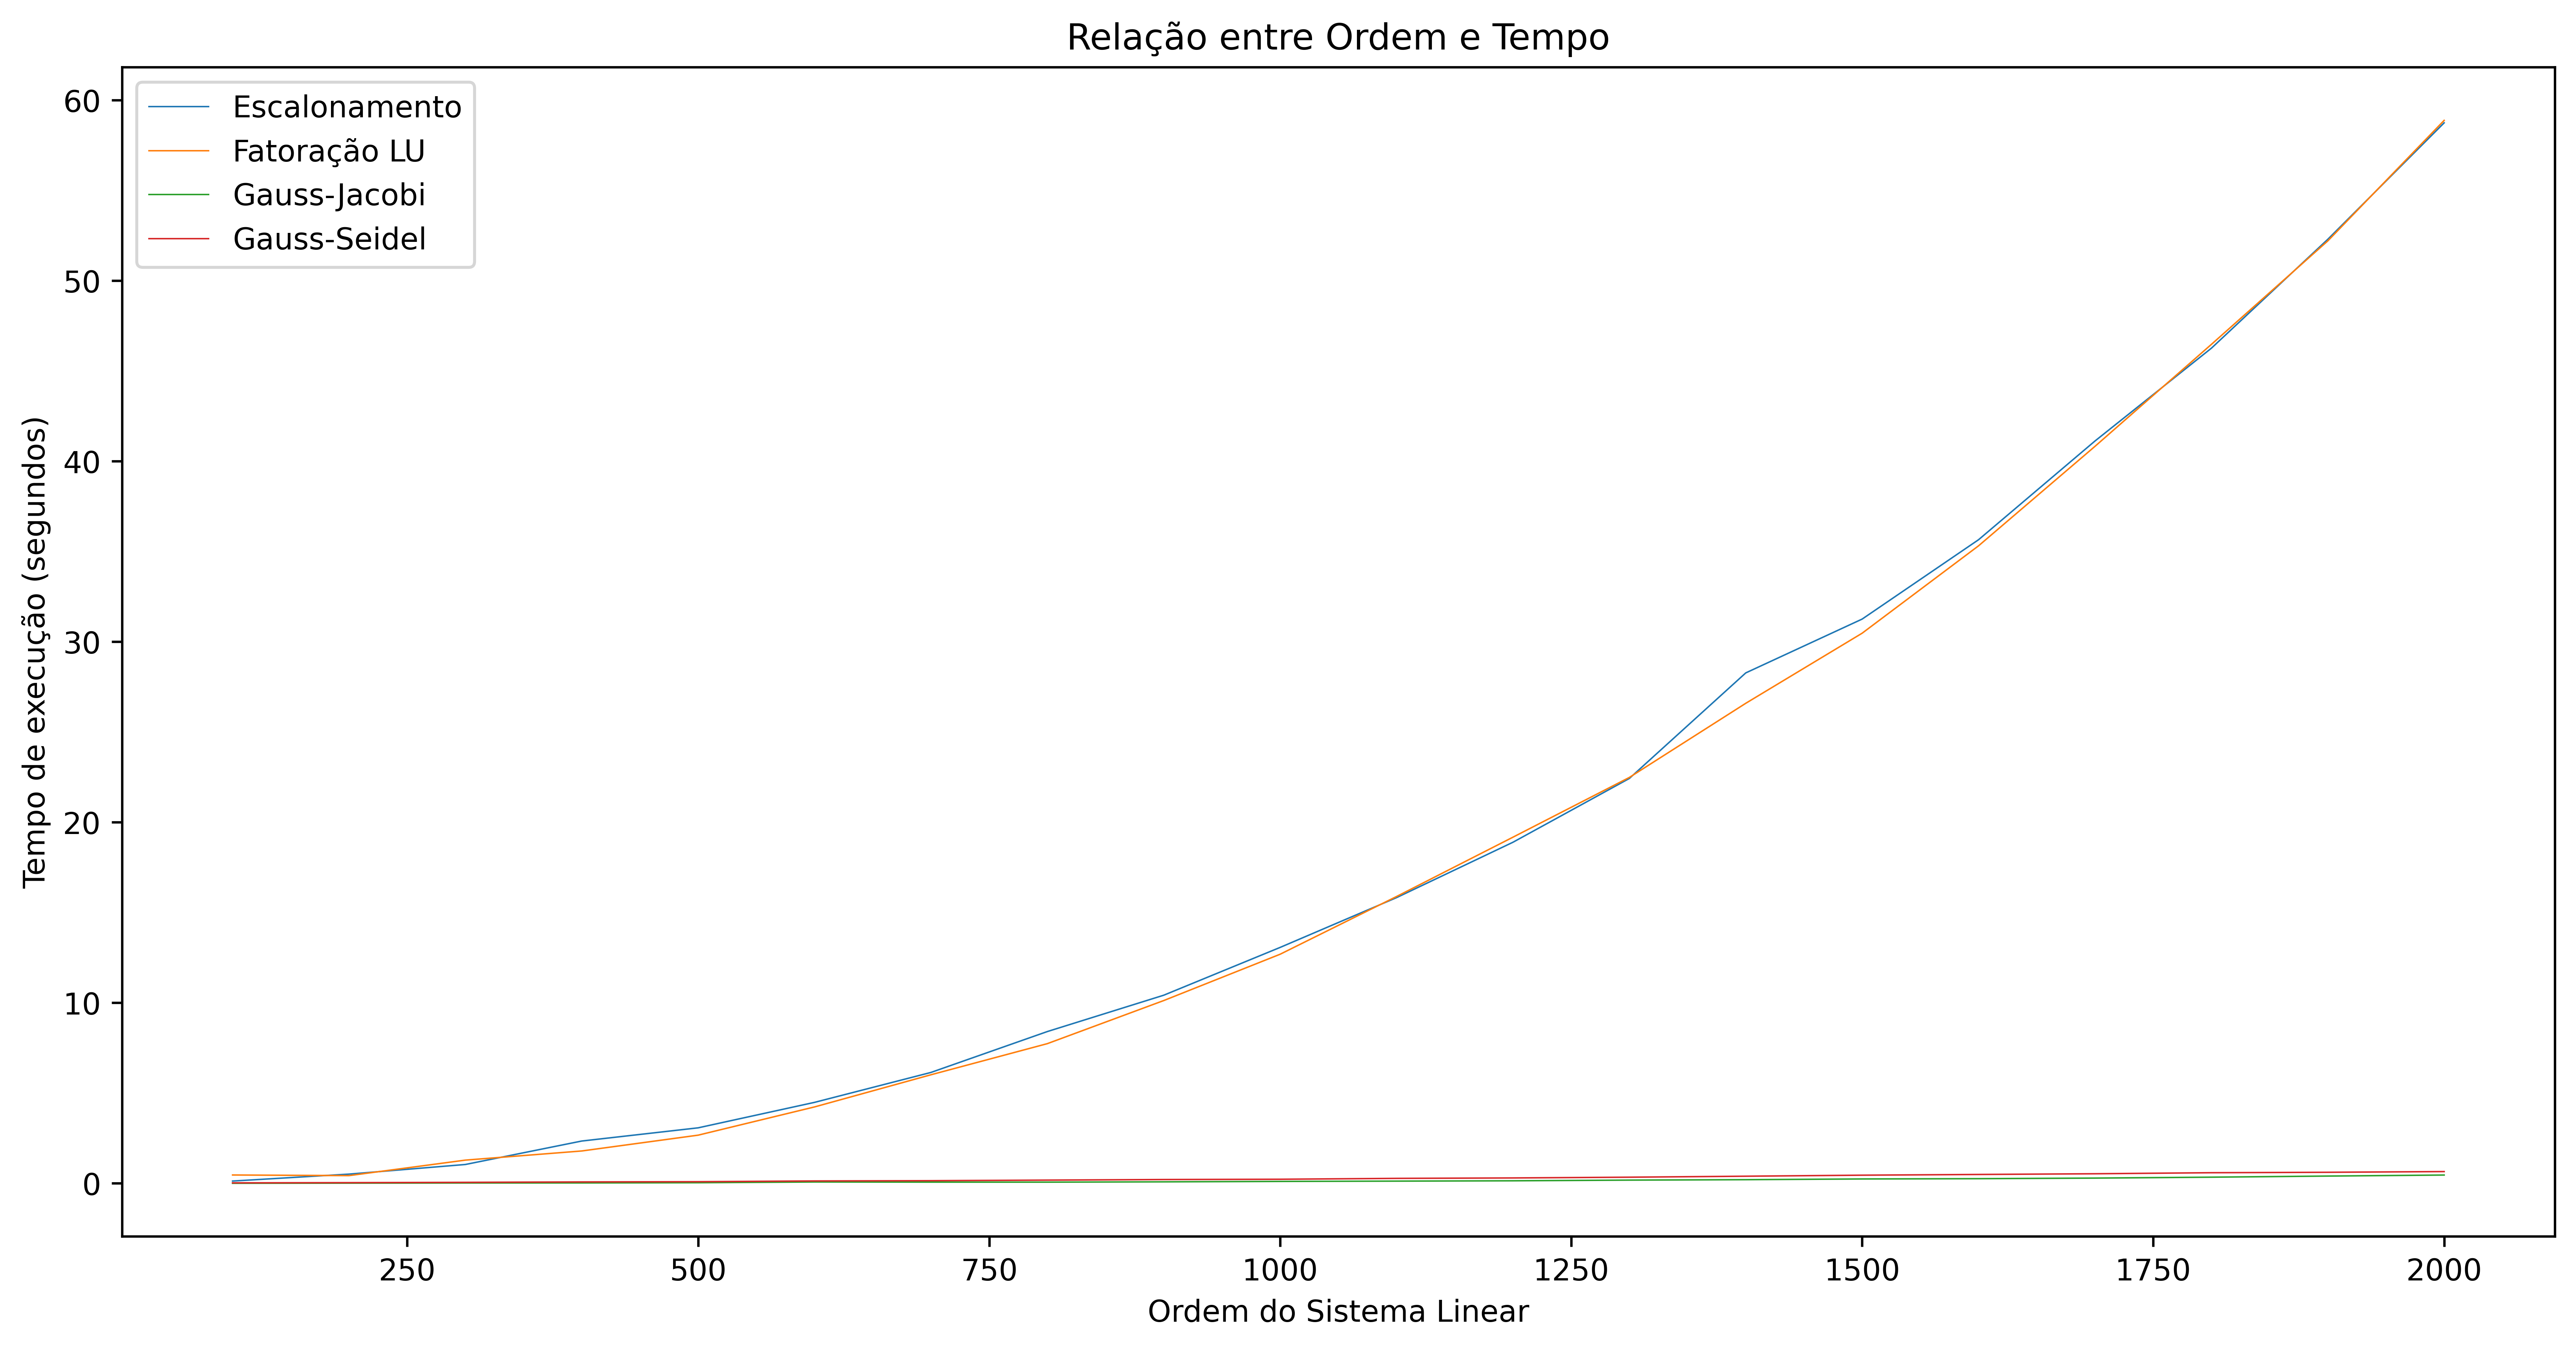

In [9]:
tamanho = arange(1, 21) * 100
plotgfx(tamanho, execução(tamanho))